# Serie temporal alternativa

In [89]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [92]:
df.shape

(366, 2)

In [93]:
df.duplicated().sum()

0

In [94]:
df.isna().sum()

date     0
sales    0
dtype: int64

# Paso 2: Construye y analiza la serie temporal


In [95]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


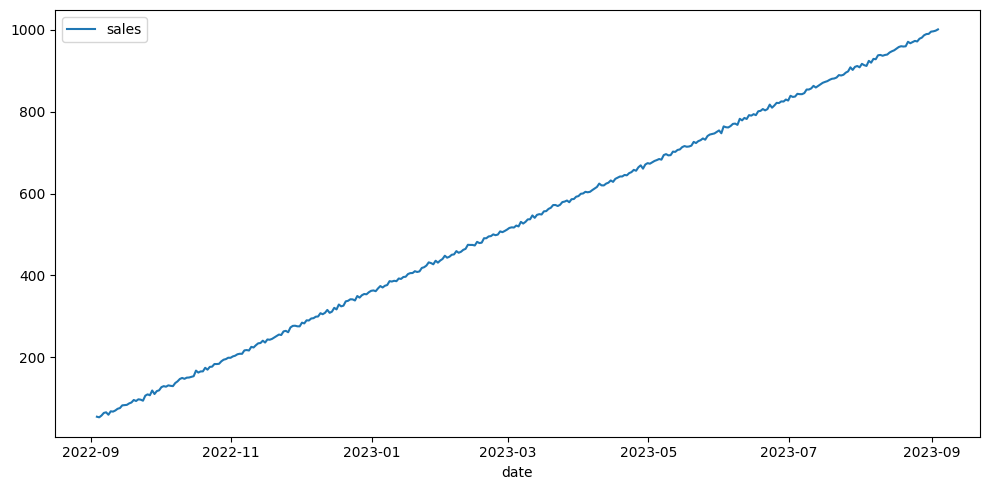

In [96]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)

plt.tight_layout()

plt.show()

ADF Statistic: 0.545414
p-value: 0.986190
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


<Figure size 1000x500 with 0 Axes>

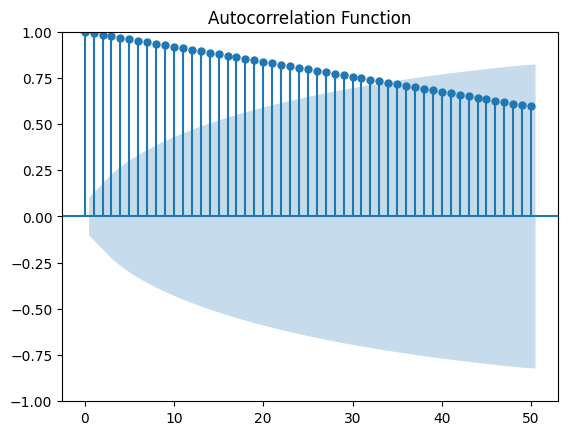

In [97]:
# Realizar la prueba de Dickey-Fuller aumentada
result = adfuller(df['sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Si el p-value es menor que 0.05, podemos rechazar la hipótesis nula
# (es decir, la serie temporal es estacionaria). Si no, no podemos rechazar la hipótesis nula.

# Graficar la función de autocorrelación
plt.figure(figsize=(10, 5))
plot_acf(df['sales'], lags=50)
plt.title('Autocorrelation Function')
plt.show()

Las barras se extienden más allá del área sombreada, lo que sugiere que hay una autocorrelación significativa en muchos rezagos. Sin embargo, el patrón de disminución gradual podría indicar un proceso estocástico o un modelo ARMA aplicable. El hecho de que la autocorrelación sea significativa en muchos rezagos y que no caiga rápidamente a cero también sugiere que la serie no es estacionaria, lo cual es consistente con los resultados de tu prueba de Dickey-Fuller Aumentada previamente mencionada.

Este tipo de patrón donde los valores de autocorrelación disminuyen lentamente y permanecen significativos en muchos rezagos podría ser indicativo de una raíz unitaria o de un proceso integrado, lo que significa que la serie temporal puede necesitar ser diferenciada para lograr la estacionariedad.

- ¿Cuál es el tensor de la serie temporal?
    - El tensor sería un arreglo unidimensional que contiene los valores de ventas.

- ¿Cuál es la tendencia?
    - Hay una tendencia ascendente en los datos, ya que los valores aumentan con el paso de tiempo sucesivo.
- ¿Es estacionaria?
    - Estadístico ADF: El valor de 0.545414 no es menor que ninguno de los valores críticos.
    - Valor p: El valor p de 0.986190 es mucho mayor que el nivel de significancia común de 0.05.
        - Dado que el estadístico ADF es mayor que los valores críticos y el valor p es mayor que 0.05, no podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria y no es estacionaria.

- ¿Existe variabilidad o presencia de ruido?
    - Con los datos anteriores nos indica que hay alguna o baja variabilidad. Si estos cambios no siguen un patrón predecible, podrían considerarse ruido.

In [98]:
df_train, df_test = df.iloc[:-183], df.iloc[-183:]

# Paso 3: Entrena un ARIMA


In [99]:
# Ajustar el modelo ARIMA
model = ARIMA(df_train['sales'], order=(1, 1, 1))
model_fit = model.fit()

# Resumen del modelo ajustado
print(model_fit.summary())


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  183
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -521.796
Date:                Fri, 24 Nov 2023   AIC                           1049.592
Time:                        00:48:47   BIC                           1059.204
Sample:                    09-03-2022   HQIC                          1053.489
                         - 03-04-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2730.533      0.000       0.999       1.001
ma.L1         -0.9996      0.351     -2.846      0.004      -1.688      -0.311
sigma2        17.6816      6.593      2.682      0.0

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


En este cuadro indica que, aunque el modelo parece ajustarse bien en algunos aspectos (por ejemplo, los coeficientes son cercanos a lo esperado para un modelo ARIMA(1, 1, 1)), hay preocupaciones significativas, especialmente en términos de autocorrelación residual (Ljung-Box) y la significancia del término MA. Estos aspectos pueden requerir una revisión y posible ajuste del modelo.

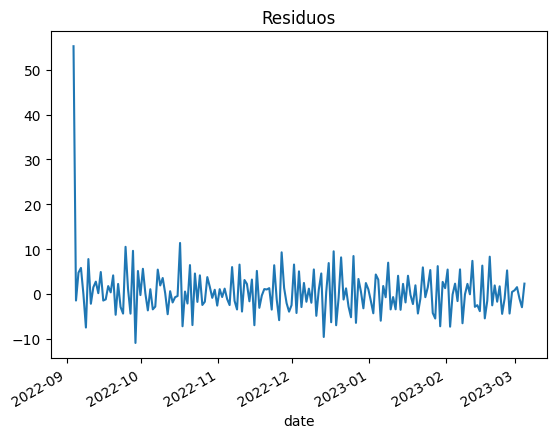

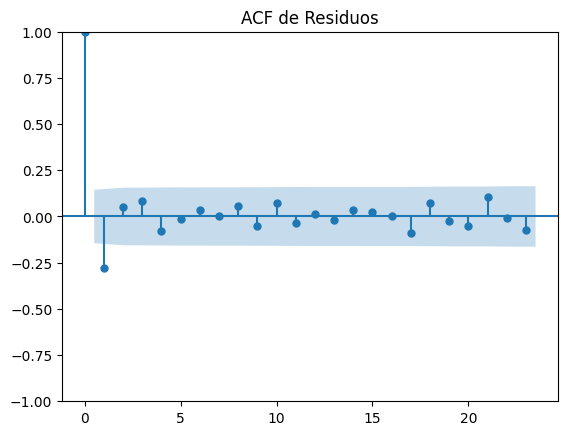

In [100]:
# Diagnóstico de residuos
residuals = model_fit.resid
residuals.plot(title="Residuos")
plt.show()

plot_acf(residuals)
plt.title('ACF de Residuos')
plt.show()


En el gráfico 1: La presencia del pico grande al principio podría ser preocupante, ya que los residuos deberían estar distribuidos al azar alrededor de cero si el modelo es adecuado. Si los residuos muestran estructura o no son estacionarios, el modelo podría necesitar ser revisado para capturar la dinámica de los datos de manera más efectiva. Esto podría incluir agregar términos estacionales a un modelo ARIMA, convirtiéndolo en un SARIMA, o investigar más sobre posibles puntos atípicos o cambios estructurales en los datos.

En el gráfico 2: La presencia de autocorrelación significativa en el retraso 1 podría ser una indicación de que el modelo puede necesitar un término adicional de MA para capturar adecuadamente la autocorrelación en los datos, o podría ser el resultado de un modelo que no se ajusta adecuadamente a la estructura subyacente de los datos. Esto puede requerir revisar y posiblemente modificar el modelo para mejorar el ajuste.

# Paso 4: Predice con el conjunto de test


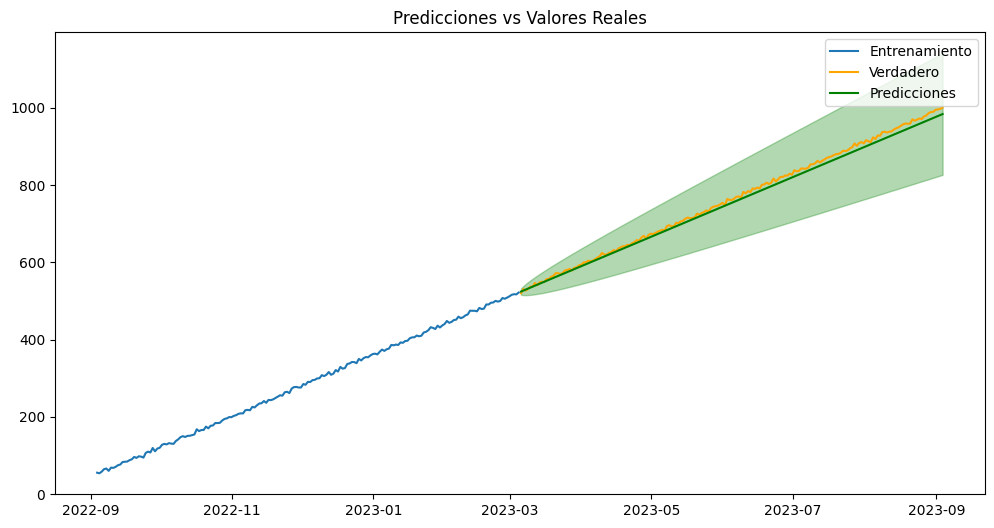

Error Cuadrático Medio (MSE): 101.86559457857679
Raíz del Error Cuadrático Medio (RMSE): 10.092848685013404
Error Absoluto Medio (MAE): 8.910841303774873


In [101]:
# Hacer predicciones en el conjunto de prueba
predicciones = model_fit.get_forecast(steps=len(df_test))
media_predicciones = predicciones.predicted_mean
intervalo_confianza = predicciones.conf_int()

# Convertir las predicciones a una serie para facilitar la comparación
predicciones_serie = pd.Series(media_predicciones, index=df_test.index)

# Comparar las predicciones con los valores reales
plt.figure(figsize=(12, 6))
plt.plot(df_train['sales'], label='Entrenamiento')
plt.plot(df_test['sales'], label='Verdadero', color='orange')
plt.plot(predicciones_serie, label='Predicciones', color='green')
plt.fill_between(intervalo_confianza.index,
                 intervalo_confianza.iloc[:, 0],
                 intervalo_confianza.iloc[:, 1], color='green', alpha=0.3)
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

# Calcular métricas de rendimiento
mse = mean_squared_error(df_test['sales'], predicciones_serie)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test['sales'], predicciones_serie)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Error Absoluto Medio (MAE): {mae}')


En el anterior gráfico podemos deducir que: 

- Dado que la línea de predicciones sigue de cerca a la línea de valores reales y permanece dentro del intervalo de confianza, esto sugiere que el modelo tiene un buen ajuste y es capaz de predecir con una precisión razonable las ventas futuras.

- El intervalo de confianza se amplía hacia el final del período de pronóstico, lo que indica que las predicciones se vuelven menos precisas a medida que se intenta predecir más adelante en el futuro.

- Si el modelo es fiable y está bien especificado, las predicciones deberían, en promedio, capturar la tendencia real de los datos, y el intervalo de confianza debería contener el verdadero valor de las ventas la mayoría de las veces (generalmente se configura para contener el verdadero valor en el 95% de los casos si se asume una distribución normal de los errores de predicción).

In [104]:
from pickle import dump

dump(model, open("/workspaces/Serie-Temporal--Alternativa/models/.gitkeep.sav", "wb"))